# Supporting Information - AST2003H-2017 Project

_Author:_ Bradley Frank
_Date:_ 17 October 2017

In this notebook, I will run through a few calculations and will produce a few important relationships which you need to include in your telescope design. 

The information contained here is as follows:
* Operational cost of a dish. Dishes get cheaper to operate as time goes by.
* $T_\mathrm{sys}$ for each dish, based on how many dishes you construct. The more dishes you build, the higher your system temperature.
* Dish efficiency as a function of build time. The shorter the build time, the less efficient your dish.
* How to calculate the sensitivity of your array.

In [298]:
import pylab as pl
import numpy as np
%matplotlib inline

def make_axes(figure=None, xlabel='', ylabel='', title=None):
    pl.xticks(fontsize=14)
    pl.yticks(fontsize=14)
    pl.xlabel(xlabel, fontsize=16)
    pl.ylabel(ylabel, fontsize=16)
    pl.grid()
    pl.title(title, fontsize=18)
    
def myround(x, base=5):
    return int(base * np.ceil(float(x)/base))

def radiometereq(N=32, t=180., v=26e3, Tsys=20., eff=1.0):
    '''
    Calculates the sensitivity of a radio interferometer 
    using the radiometer equation.
    N: Number of Dishes
    t: Time in Seconds
    v: Frequency in Hz
    aovert: Area / Tsys
    '''
    k = 1.38064852e3
    top = pl.sqrt(2.)*k*Tsys
    bottom = eff*pl.sqrt(N*(N-1)*v*t)
    sens = top/bottom
    return sens

Total Cost Per Dish: 1200.00 CR
Max Number of Dishes 64
Cost to operate 154 dishes for  7 hours = 1970714
Cost to operate 325 dishes for  2 hours = 1807979


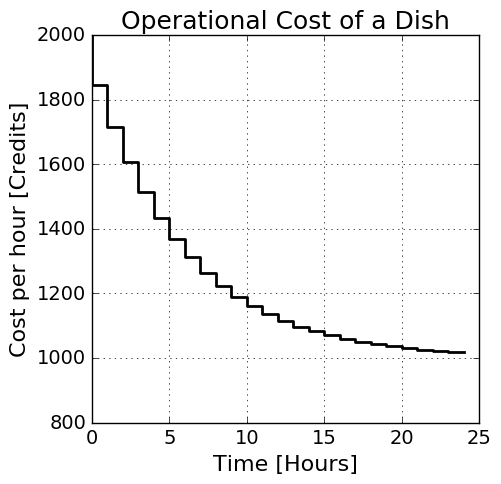

In [299]:
figure = pl.figure(figsize=(5,5))

daily_op_budget = 2.e6
P0 = 1000.
P_switch_on = 1000.
time = np.arange(0,25,1)
t = 6.
P_per_hour = P0*np.exp(-time/t)+P_switch_on
pl.step(time,P_per_hour, 'k-', lw=2)


make_axes(figure=figure, xlabel='Time [Hours]', 
          ylabel='Cost per hour [Credits]',
          title='Operational Cost of a Dish')
pl.ylim(800,2000)
pl.savefig('operational-cost.png', dpi=300)
print "Total Cost Per Dish:", "{:2.2f}".format(y.sum()), "CR"

# How many dishes would you be able to operate for 24-hours, 
# with your daily budget?
print "Max Number of Dishes", "{:2.0f}".format(daily_op_budget/P_per_hour.sum())

# Say you had 154 dishes. How long would you be able to operate the telescope?
# There's definitely a better way to do this, but I've just guessed a value of tmax
# and calculated the total cost.

N_dishes = 154
t_max = 7
time = np.arange(0,t_max+1,1)
P_per_hour = P0*np.exp(-time/t)+P_switch_on
P_per_telescope = P_per_hour.sum()
P_total = P_per_telescope*N_dishes
print "Cost to operate", N_dishes, "dishes for ", t_max, "hours =", "{:2.0f}".format(P_total)


# Say you had 325 dishes. How long would you be able to operate the telescope?
# There's definitely a better way to do this, but I've just guessed a value of tmax
# and calculated the total cost.

N_dishes = 325
t_max = 2
time = np.arange(0,t_max+1,1)
P_per_hour = P0*np.exp(-time/t)+P_switch_on
P_per_telescope = P_per_hour.sum()
P_total = P_per_telescope*N_dishes
print "Cost to operate", N_dishes, "dishes for ", t_max, "hours =", "{:2.0f}".format(P_total)

## $T_\mathrm{sys}$ for telescopes

Radio telescopes are often cryogenically cooled to achieve a good sensitivity, since the sensitivity $\sigma$ of a single radio receptor (i.e., a _radiometer_) is given by the following expression: 

$\sigma = \frac{\sqrt{2}k_\mathrm{B}T_\mathrm{sys}}{(N(N-1)\cdot T\cdot\Delta\nu)^{\frac{1}{2}}}$

To increase the sensitivity is to decrease the number $\sigma$, which can be achieved by:
* Building more telescopes, i.e., increase $N$.
* Increasing the observational time $T$.
* Increasing the bandwidth, $\Delta \nu$.
* Decreasing the system temperature, $T_\mathrm{sys}$.

Each of these factors need to be balanced and optimized. 

It ought to be clear that it becomes extremely expensive to provide cryogenic cooling for a large number of dishes. 

For your project, you will assume that every lot of 50-dishes increases the per-dish $T_\mathrm{sys}$ of every antenna in your array, and is given by the following expression:

$T_\mathrm{sys-per-dish}=\tau_\mathrm{sys}\times N+N_0$

where $\tau_\mathrm{sys}=0.3$ and $N_0=1$ and $N$ is rounded _up_ to the nearest multiple of **50**.

In the next cell, I illustrate how this relation works. 

Example: if you have 154 dishes, you will have to round this up to 200 to calculate the $T_\mathrm{sys-per-dish}$. This is illustrated in the following cell:

Tsys-per-dish for 154 dishes = 61.00 K


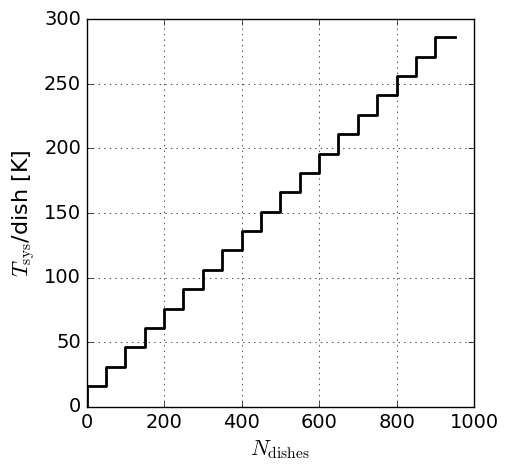

In [300]:
tsys = 0.3
n0 = 1

# Setup an integer array
num_dishes = np.arange(0,1000,50)

tsys_per_dish = tsys*num_dishes+n0
pl.figure(figsize=(5,5))
pl.step(num_dishes, tsys_per_dish, 'k-', lw=2)

make_axes(xlabel='$N_\mathrm{dishes}$', ylabel='$T_\mathrm{sys}$/dish [K]', title='')

pl.savefig('tsys-per-dish.png', dpi=300)

# What would be the Tsys-per-dish if you had 154 dishes?
N = 154.
tsys_per_dish = tsys*myround(N, base=50)+n0

print "Tsys-per-dish for 154 dishes = " "{:2.2f}".format(tsys_per_dish), "K"

## Efficiency as a function of build time

In your project, you will need to balance the construction of your array with the time needed for your survey. For example, if your telescope design comprises a large number of dishes (e.g., 200), constructing the telescope will eat-into precious observational time. 
However, you could _increase_ the time taken to build a dish, which would mitigate against the loss of observing time, but this may lead to a relaxation in the scrutiny of the manufacturing process and the standard of each dish. It is therefore reasonable to assume that a reduction in the build time of a single dish will lead to a corresponding reduction in the statistical efficiency of the dish. 

Suppose you have 100 dishes, and your array operates at an 80% efficiency. This means that, at any given time, only 80 of your dishes will be online and available for operations. The remaining dishes are either broken or offline for repairs/maintenance., for example. 

The efficiency of your telescopes, as a function of build time, is to be calculated as follows.

The maximum amount of time needed to build a dish is 2-days, and this ensures a 100% efficiency of each dish built. The minimum amount of time required is 0.5 days, but this produces dishes with a 50% efficiency. We are going to assume that the efficiency increases linearly with time.

The efficiency $\eta$ is thus expressed as the linear function 

$\eta=kN+\eta_0$. In the following cell I calculate the corresponding values of $k$ and $\eta_0$.

Build Time =  0.8 / Efficiency =  60.00
Build Time =  1.6 / Efficiency =  86.67


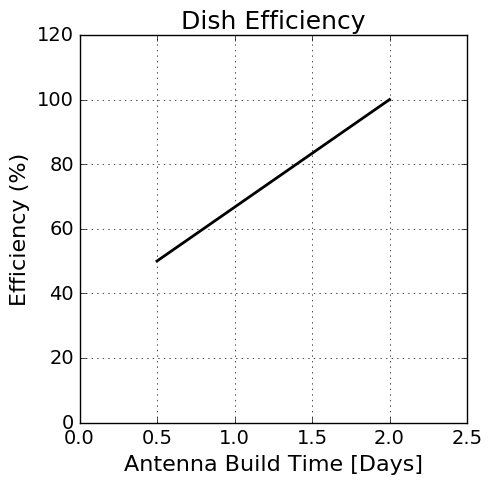

In [301]:
m = (100.-50.)/(2.-0.5)
c = ((100.+50)-m*(2+0.5))/2
x = np.arange(0.5,2.1,0.1)
y = m*x+c
pl.figure(figsize=(5,5))
pl.plot(x,y, 'k-', lw=2)
pl.xlim(0,2.5)
pl.ylim(0,120)
make_axes(xlabel='Antenna Build Time [Days]', 
          ylabel='Efficiency (%)', 
         title="Dish Efficiency")
pl.savefig('dish-efficiency.png', dpi=300)
# What is the efficiency for a few build times?

my_build_time = 0.8
my_efficiency  = m*my_build_time + c
print "Build Time = ", my_build_time, "/ Efficiency = ", "{:2.2f}".format(my_efficiency)

my_build_time = 1.6
my_efficiency  = m*my_build_time + c
print "Build Time = ", my_build_time, "/ Efficiency = ", "{:2.2f}".format(my_efficiency)

## Sensitivity of Your Array

I have defined a function at the top that calculates the **Naturally Weighted Sensitivity** of a radio telescope.
In the following cell, I calculate the sensitivity for a 500-dish array with $T_\mathrm{sys}=20\,\mathrm{K}$, and with a perfect efficiency. 

**Important Note**: I have also printed the sensitivity for observational times of 4,8,12,...,24 hours. When you calculate your sky model, you will need to specify the faintest sources that you can observe in a single-day observation, and the flux of these faint source can be a few multiples of the sensitivity that you expect. 
Detecting this faint source after a single-observation will be a good way to study whether you will be able to detect even fainter sources after the full survey duration.

Sensitivity =  651.50 microJansky after  4  hours
Sensitivity =  460.68 microJansky after  8  hours
Sensitivity =  376.14 microJansky after  12  hours
Sensitivity =  325.75 microJansky after  16  hours
Sensitivity =  291.36 microJansky after  20  hours
Sensitivity =  265.97 microJansky after  24  hours


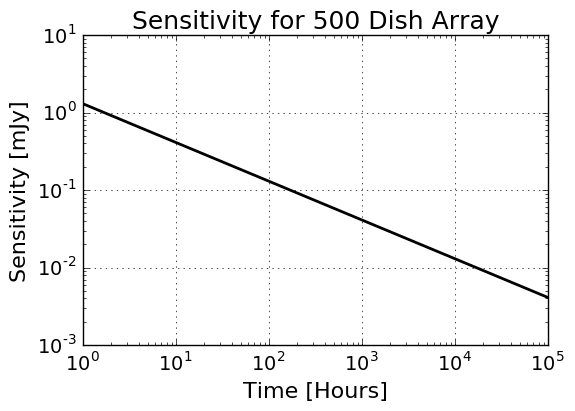

In [302]:
# Time in hours. 1-year is about 10,000 hours.
t = np.logspace(0,5,10)
N=500
v=1e6
Tsys = 20.
eff = 1.0
pl.plot(t, radiometereq(N=N, t=t*3600., v=v, Tsys=Tsys, eff=eff)*1e3, 'k-', lw=2)
pl.loglog()
make_axes(xlabel='Time [Hours]', ylabel='Sensitivity [mJy]', title='Sensitivity for 500 Dish Array')
pl.savefig('sensitivity-500-dish.png', dpi=300)

T=[4,8,12,16,20,24]
for t in T:
    print "Sensitivity = ", "{:2.2f}".format(radiometereq(N=500, t=t*3600., v=1e6, Tsys=20., eff=1.0)*1e6), "microJansky after ", t, " hours"
